In [1]:
#pip install tensorflow

In [2]:
#pip install --upgrade pip

In [3]:
%matplotlib inline
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("prepared_with_events_GBPUSD.csv")


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,USGoldSteinScale,USNumMentions,GBRGoldSteinScale,GBRNumMentions
0,2005-05-01,1.906214,1.906614,1.893186,1.894801,1.894801,0.0,0.0,0.0,0.0
1,2005-05-02,1.906214,1.906614,1.893186,1.894801,1.894801,-10.0,10.0,7.0,10.0
2,2005-05-03,1.895016,1.895483,1.889288,1.893688,1.893688,0.0,0.0,0.0,0.0
3,2005-05-04,1.893509,1.903203,1.893007,1.902117,1.902117,0.0,0.0,0.0,0.0
4,2005-05-05,1.902117,1.907414,1.899985,1.902515,1.902515,0.0,0.0,0.0,0.0


In [5]:
df.Date=  pd.to_datetime(df['Date'])

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,USGoldSteinScale,USNumMentions,GBRGoldSteinScale,GBRNumMentions
0,2005-05-01,1.906214,1.906614,1.893186,1.894801,1.894801,0.0,0.0,0.0,0.0
1,2005-05-02,1.906214,1.906614,1.893186,1.894801,1.894801,-10.0,10.0,7.0,10.0
2,2005-05-03,1.895016,1.895483,1.889288,1.893688,1.893688,0.0,0.0,0.0,0.0
3,2005-05-04,1.893509,1.903203,1.893007,1.902117,1.902117,0.0,0.0,0.0,0.0
4,2005-05-05,1.902117,1.907414,1.899985,1.902515,1.902515,0.0,0.0,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6635 entries, 0 to 6634
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               6635 non-null   datetime64[ns]
 1   Open               6635 non-null   float64       
 2   High               6635 non-null   float64       
 3   Low                6635 non-null   float64       
 4   Close              6635 non-null   float64       
 5   Adj Close          6635 non-null   float64       
 6   USGoldSteinScale   6635 non-null   float64       
 7   USNumMentions      6635 non-null   float64       
 8   GBRGoldSteinScale  6635 non-null   float64       
 9   GBRNumMentions     6635 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 518.5 KB


In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,USGoldSteinScale,USNumMentions,GBRGoldSteinScale,GBRNumMentions
0,2005-05-01,1.906214,1.906614,1.893186,1.894801,1.894801,0.0,0.0,0.0,0.0
1,2005-05-02,1.906214,1.906614,1.893186,1.894801,1.894801,-10.0,10.0,7.0,10.0
2,2005-05-03,1.895016,1.895483,1.889288,1.893688,1.893688,0.0,0.0,0.0,0.0
3,2005-05-04,1.893509,1.903203,1.893007,1.902117,1.902117,0.0,0.0,0.0,0.0
4,2005-05-05,1.902117,1.907414,1.899985,1.902515,1.902515,0.0,0.0,0.0,0.0


In [9]:
df = df.set_index("Date")

In [10]:
df.head()

,Open,High,Low,Close,Adj Close,USGoldSteinScale,USNumMentions,GBRGoldSteinScale,GBRNumMentions
Date,,,,,,,,,
2005-05-01,1.906214,1.906614,1.893186,1.894801,1.894801,0.0,0.0,0.0,0.0
2005-05-02,1.906214,1.906614,1.893186,1.894801,1.894801,-10.0,10.0,7.0,10.0
2005-05-03,1.895016,1.895483,1.889288,1.893688,1.893688,0.0,0.0,0.0,0.0
2005-05-04,1.893509,1.903203,1.893007,1.902117,1.902117,0.0,0.0,0.0,0.0
2005-05-05,1.902117,1.907414,1.899985,1.902515,1.902515,0.0,0.0,0.0,0.0


Create the Model

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout, Activation, Dense, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# Setting the random seeds
np.random.seed(42)
tf.random.set_seed(42)

# Extract features and target (Close column)
features = df[['Open', 'High', 'Low', 'Adj Close','USGoldSteinScale','USNumMentions','GBRGoldSteinScale','GBRNumMentions','Close']].values

# Scale the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

seq_len = 30

def split_into_sequences(arr, seq_len):
    n_seq = len(arr) - seq_len + 1
    return np.array([arr[i:(i+seq_len)] for i in range(n_seq)])

def get_train_test_sets(arr, seq_len, train_frac):
    sequences = split_into_sequences(arr, seq_len)

    n_train = int(sequences.shape[0] * train_frac)
    x_train = sequences[:n_train, :-1, :-1]  # Exclude the Close column for input sequences
    y_train = sequences[:n_train, -1, -1]    # Only the Close column for the target
    x_test = sequences[n_train:, :-1, :-1]
    y_test = sequences[n_train:, -1, -1]

    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = get_train_test_sets(scaled_features, seq_len, train_frac=0.8)

y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

# Fraction of the input to drop; helps prevent overfitting
dropout = 0.3
window_size = seq_len - 1

# Build a 3-layer LSTM RNN
model = keras.Sequential()

model.add(
    LSTM(window_size, return_sequences=True,
         input_shape=(window_size, x_train.shape[-1]))
)

model.add(Dropout(rate=dropout))
model.add(
    LSTM((window_size * 2), return_sequences=True)
)
model.add(Dropout(rate=dropout))

model.add(
    LSTM(window_size, return_sequences=False)
)
model.add(Dropout(rate=dropout))

model.add(Dense(units=1))
model.add(Activation('linear'))


batch_size = 32
learning_rate = 0.001

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(
    loss='mean_squared_error',
    optimizer=optimizer
)
early_stopping = EarlyStopping(monitor='val_loss', patience=15)
history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=batch_size,
    shuffle=False,
    validation_split=0.2,
    callbacks=[early_stopping]
)


Epoch 1/50
133/133 [==============================] - 8s 34ms/step - loss: 0.0267 - val_loss: 0.0011
Epoch 2/50
133/133 [==============================] - 4s 29ms/step - loss: 0.0147 - val_loss: 0.0014
Epoch 3/50
133/133 [==============================] - 4s 30ms/step - loss: 0.0098 - val_loss: 3.7941e-04
Epoch 4/50
133/133 [==============================] - 4s 29ms/step - loss: 0.0088 - val_loss: 4.4448e-04
Epoch 5/50
133/133 [==============================] - 4s 29ms/step - loss: 0.0091 - val_loss: 5.2904e-04
Epoch 6/50
133/133 [==============================] - 4s 29ms/step - loss: 0.0108 - val_loss: 0.0026
Epoch 7/50
133/133 [==============================] - 4s 27ms/step - loss: 0.0132 - val_loss: 0.0019
Epoch 8/50
133/133 [==============================] - 4s 29ms/step - loss: 0.0128 - val_loss: 0.0026
Epoch 9/50
133/133 [==============================] - 4s 31ms/step - loss: 0.0140 - val_loss: 0.0079
Epoch 10/50
133/133 [==============================] - 4s 33ms/step - loss: 0.0

Plotting training and validation loss

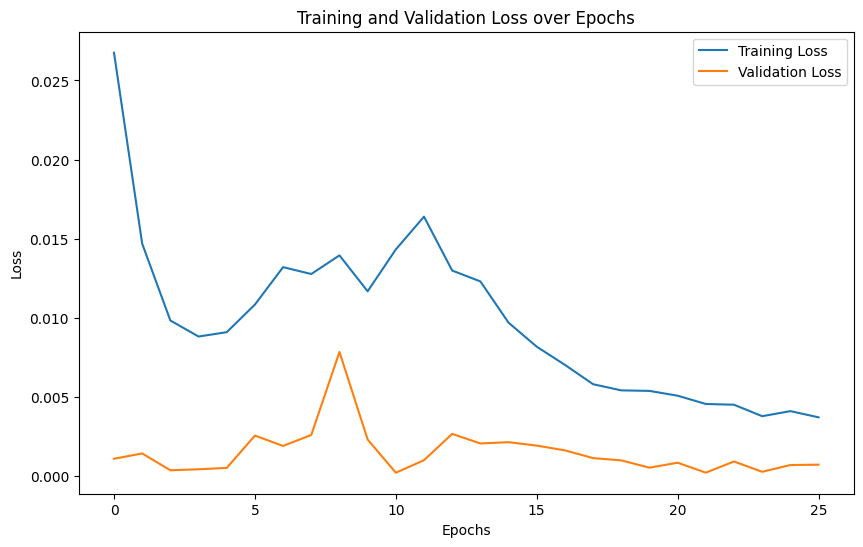

In [12]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Prediction

42/42 [==============================] - 3s 13ms/step


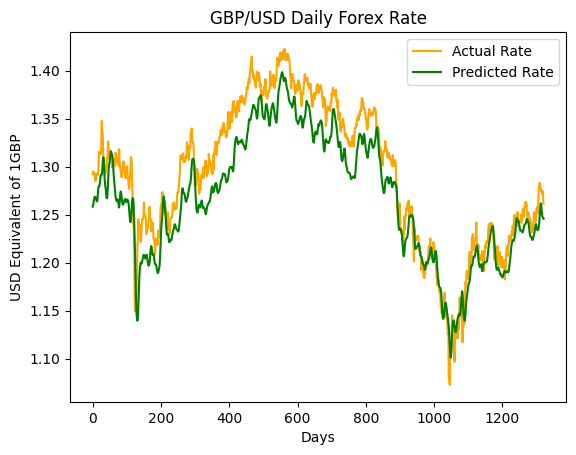

In [13]:
y_pred = model.predict(x_test)

# To invert the scaler, we create a placeholder array with the same shape as `scaled_features`.
placeholder_array_test = np.zeros((len(y_test), scaled_features.shape[1]))
placeholder_array_pred = np.zeros((len(y_pred), scaled_features.shape[1]))

# Insert the y_test and y_pred data into the last column of the placeholder arrays
placeholder_array_test[:,-1] = y_test[:,0]
placeholder_array_pred[:,-1] = y_pred[:,0]

# Invert the scaler to get the absolute price data
y_test_orig = scaler.inverse_transform(placeholder_array_test)[:,-1]
y_pred_orig = scaler.inverse_transform(placeholder_array_pred)[:,-1]

# plots of prediction against actual data
plt.plot(y_test_orig, label='Actual Rate', color='orange')
plt.plot(y_pred_orig, label='Predicted Rate', color='green')

plt.title('GBP/USD Daily Forex Rate')
plt.xlabel('Days')
plt.ylabel('USD Equivalent of 1GBP')
plt.legend(loc='best')

plt.show()


Complete plot

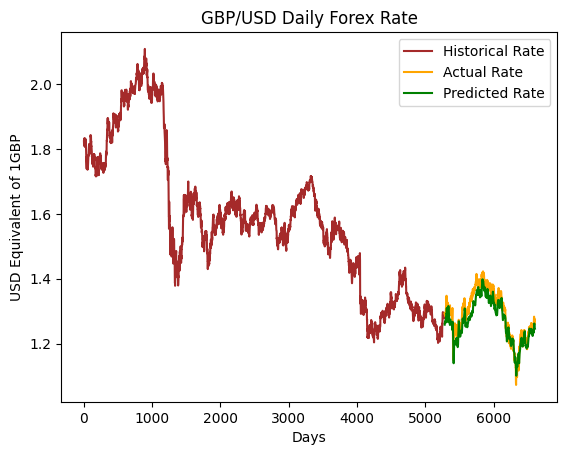

In [14]:
# Prepare a placeholder array for y_train for the inverse transformation
placeholder_array_train = np.zeros((len(y_train), scaled_features.shape[1]))
placeholder_array_train[:,-1] = y_train[:,0]
y_train_orig = scaler.inverse_transform(placeholder_array_train)[:,-1]

# Plot for the entire range of data
plt.plot(np.arange(0, len(y_train)), y_train_orig, color='brown', label='Historical Rate')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test_orig)), y_test_orig, color='orange', label='Actual Rate')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_pred_orig)), y_pred_orig, color='green', label='Predicted Rate')

plt.title('GBP/USD Daily Forex Rate')
plt.xlabel('Days')
plt.ylabel('USD Equivalent of 1GBP')
plt.legend()
plt.show()


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 29, 29)            4408      
                                                                 
 dropout (Dropout)           (None, 29, 29)            0         
                                                                 
 lstm_1 (LSTM)               (None, 29, 58)            20416     
                                                                 
 dropout_1 (Dropout)         (None, 29, 58)            0         
                                                                 
 lstm_2 (LSTM)               (None, 29)                10208     
                                                                 
 dropout_2 (Dropout)         (None, 29)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [16]:
mse = mean_squared_error(y_test_orig, y_pred_orig)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)

print("Param:", seq_len, batch_size)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Param: 30 32
Mean Squared Error (MSE): 0.0009111163919973909
Root Mean Squared Error (RMSE): 0.030184704603447604
Mean Absolute Error (MAE): 0.026037236492390082
R-squared (R2) Score: 0.8354125097694225
